# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

**Zadanie 1.**  
Zaimplementuj metodę *solve_euler* z main.py 

In [23]:
from typing import Union, Callable
def solve_euler(fun: Callable, t_span: np.array, y0: np.array):
    ''' 
    Funkcja umożliwiająca rozwiązanie układu równań różniczkowych z wykorzystaniem metody Eulera w przód.
    
    Parameters:
    fun: Prawa strona równania. Podana funkcja musi mieć postać fun(t, y). 
    Tutaj t jest skalarem i istnieją dwie opcje dla ndarray y: Może mieć kształt (n,); wtedy fun musi zwrócić array_like z kształtem (n,). 
    Alternatywnie może mieć kształt (n, k); wtedy fun musi zwrócić tablicę typu array_like z kształtem (n, k), tj. każda kolumna odpowiada jednej kolumnie w y. 
    t_span: wektor czasu dla którego ma zostać rozwiązane równanie
    y0: warunke początkowy równania o wymiarze (n,)
    Results:
    (np.array): macierz o wymiarze (n,m) zawierająca w wkolumnach kolejne rozwiązania fun w czasie t_span. W przypadku błędnych danych wejściowych powinna zwracać None

    '''
    try:
        y = y0
        for i in range(0, y.shape[0] - 1):
            y[i + 1, :] = y[i, :] + fun(y[i, :], t_span[i]) * (t_span[i + 1] - t_span[i])
        return y
    except:
        return None


***Zadanie 2.*** 

Dla 3 różnych kroków czasowych (1e1, 1e-2, 1e-5) korzystając z metody z zadania 1 rozwiąż równanie 

$
\dot{x}(t)= \frac{x+t}{x-t}
$ 

$x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$).

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.


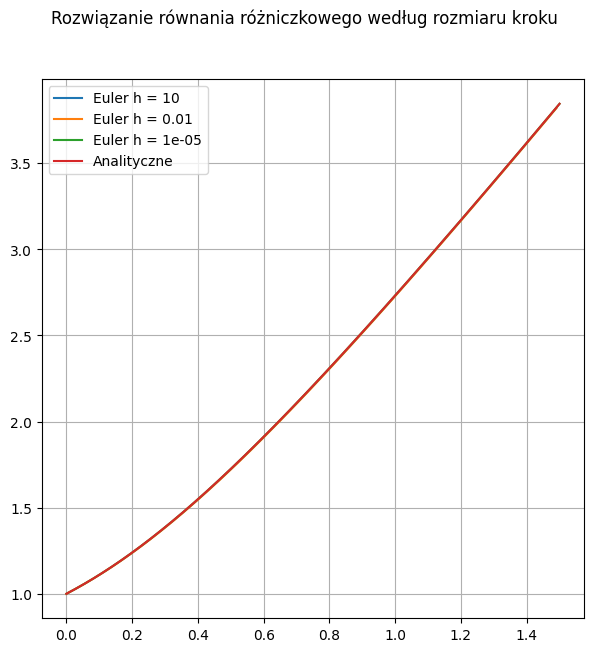

In [31]:
from main import solve_euler

h1, h2, h3 = 10, 0.01, 0.00001

t1, t2, t3 = np.arange(0, 1.5, h1), np.arange(0, 1.5, h2), np.arange(0, 1.5, h3)

fun1 = lambda x, t: (x + t) / (x - t)
fun1_a = lambda t: t + np.sqrt(1 + 2 * t ** 2)

x1, x2, x3 = np.zeros((len(t1), 1)), np.zeros((len(t2), 1)), np.zeros((len(t3), 1))
x1[0], x2[0], x3[0] = 1, 1, 1

y11, y12, y13 = solve_euler(fun1, t1, x1), solve_euler(fun1, t2, x2), solve_euler(fun1, t3, x3)

fig1, diff = plt.subplots(figsize=(7, 7))
fig1.suptitle('Rozwiązanie równania różniczkowego według rozmiaru kroku')

diff.plot(t1, y11, label=f'Euler h = {h1}')
diff.plot(t2, y12, label=f'Euler h = {h2}')
diff.plot(t3, y13, label=f'Euler h = {h3}')
diff.plot(t3, fun1_a(t3), label='Analityczne')
diff.legend()
diff.grid()

plt.show()


Z wykresu można odnieść wrażenie, że wartość rozwiązania wyznaczona za pomocą eulera pokrywa się z analityczną wartością.

***Zadanie 3.*** 

Dla 3 różnych kroków czasowych (1e1, 1e-2, 1e-5):

1. Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

2. Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.
3. Sprawdź po jakim czasie t rozwiązania numeryczne przestaną dawać zadowalające wyniki. W tym celu zbadaj błąd między rozwiązania numerycznego względem szczagólnego

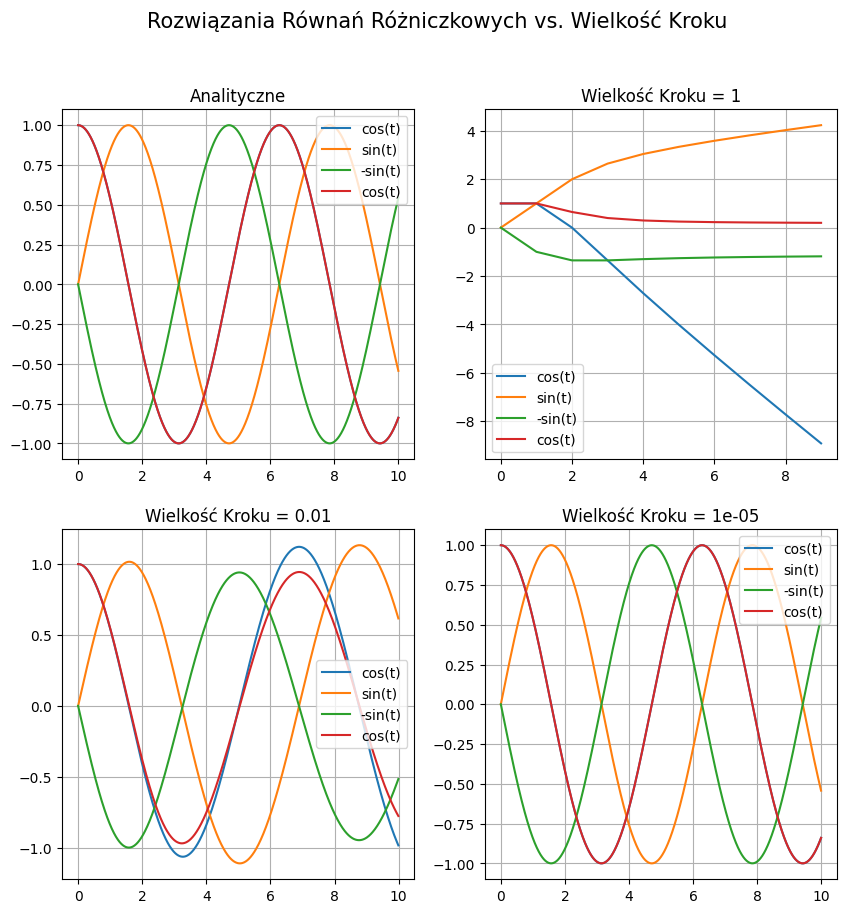

In [25]:
from main import solve_euler
import numpy as np
import matplotlib.pyplot as plt

krok1 = 1
krok2 = 0.01
krok3 = 0.00001
czas1 = np.arange(0, 10, krok1)
czas2 = np.arange(0, 10, krok2)
czas3 = np.arange(0, 10, krok3)

def x_prim_t(x, t):
    xp1 = x[2]
    xp2 = x[3]
    xp3 = -x[0] / ((x[0] ** 2 + x[1] ** 2) ** (3/2))
    xp4 = -x[1] / ((x[0] ** 2 + x[1] ** 2) ** (3/2))
    return np.array([xp1, xp2, xp3, xp4])

warunek_poczatkowy = [1, 0, 0, 1]

stan1 = np.zeros((len(czas1), 4))
stan2 = np.zeros((len(czas2), 4))
stan3 = np.zeros((len(czas3), 4))
stan1[0] = warunek_poczatkowy
stan2[0] = warunek_poczatkowy
stan3[0] = warunek_poczatkowy

rozwiazanie1 = solve_euler(x_prim_t, czas1, stan1)
rozwiazanie2 = solve_euler(x_prim_t, czas2, stan2)
rozwiazanie3 = solve_euler(x_prim_t, czas3, stan3)

fig2, ((ax_analityczny, ax_h1), (ax_h2, ax_h3)) = plt.subplots(2, 2, figsize=(10, 10))
fig2.suptitle('Rozwiązania Równań Różniczkowych vs. Wielkość Kroku', fontsize=15)

ax_analityczny.plot(czas3, np.cos(czas3), label='cos(t)')
ax_analityczny.plot(czas3, np.sin(czas3), label='sin(t)')
ax_analityczny.plot(czas3, -np.sin(czas3), label='-sin(t)')
ax_analityczny.plot(czas3, np.cos(czas3), label='cos(t)')
ax_analityczny.legend()
ax_analityczny.set_title('Analityczne')
ax_analityczny.grid()

ax_h1.plot(czas1, rozwiazanie1[:, 0], label='cos(t)')
ax_h1.plot(czas1, rozwiazanie1[:, 1], label='sin(t)')
ax_h1.plot(czas1, rozwiazanie1[:, 2], label='-sin(t)')
ax_h1.plot(czas1, rozwiazanie1[:, 3], label='cos(t)')
ax_h1.legend()
ax_h1.set_title(f'Wielkość Kroku = {krok1}')
ax_h1.grid()

ax_h2.plot(czas2, rozwiazanie2[:, 0], label='cos(t)')
ax_h2.plot(czas2, rozwiazanie2[:, 1], label='sin(t)')
ax_h2.plot(czas2, rozwiazanie2[:, 2], label='-sin(t)')
ax_h2.plot(czas2, rozwiazanie2[:, 3], label='cos(t)')
ax_h2.legend()
ax_h2.set_title(f'Wielkość Kroku = {krok2}')
ax_h2.grid()

ax_h3.plot(czas3, rozwiazanie3[:, 0], label='cos(t)')
ax_h3.plot(czas3, rozwiazanie3[:, 1], label='sin(t)')
ax_h3.plot(czas3, rozwiazanie3[:, 2], label='-sin(t)')
ax_h3.plot(czas3, rozwiazanie3[:, 3], label='cos(t)')
ax_h3.legend()
ax_h3.set_title(f'Wielkość Kroku = {krok3}')
ax_h3.grid()

plt.show()


Zmniejszanie kroku czasowego w numerycznym rozwiązaniu równań różniczkowych poprawia dokładność, ale zwiększa koszt obliczeniowy.
Dla większych kroków czasowych obserwujemy istotne rozbieżności między rozwiązaniami numerycznymi a analitycznymi wynikami, co wskazuje na ograniczenia metody numerycznej.

***Zadanie 4.*** 

Za pomocą funkcji solve_ivp przy wykorzystaniu dwóch metod RK45 i RK23 rozwiąż układ równań z poprzedniego zadania i porównaj wyniki dla takiego samego przedziału czasu.

Sprawdź ile razy każda z metod obliczała równanie prawej strony (parametr nfev). Odnieś to do analogicznej liczby z metody z poprzedniego zadania

Dla wybranej metody zbadaj wpływ parametru rtol na rozwiązanie

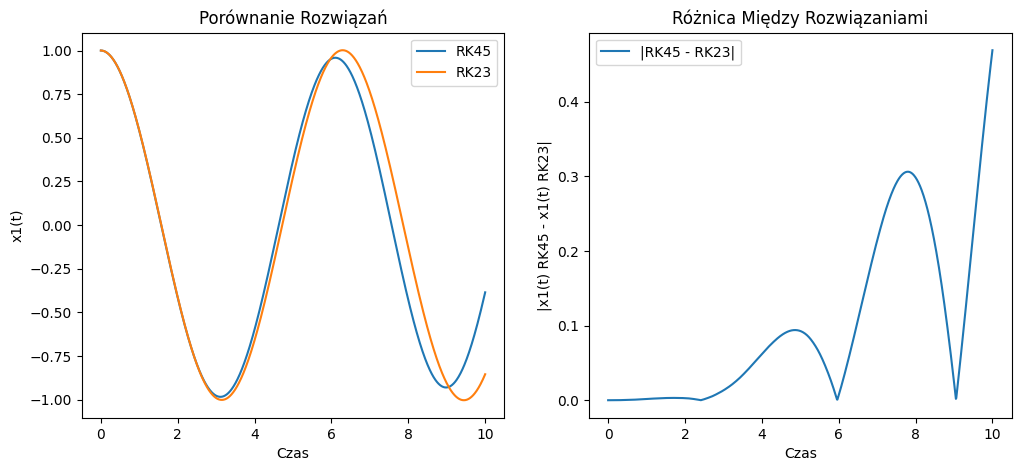

Liczba ocen funkcji (nfev) dla RK45: 104
Liczba ocen funkcji (nfev) dla RK23: 164


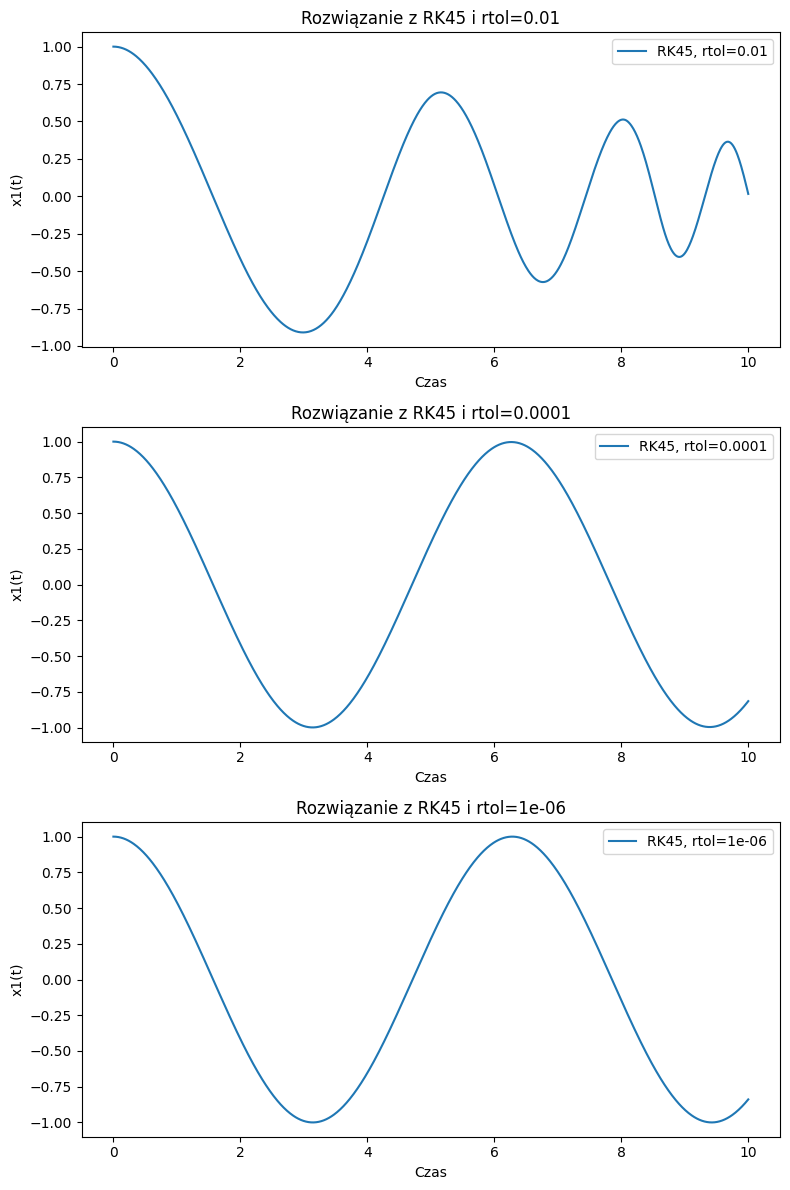

In [26]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def x_prim_t(t, x):
    xp1 = x[2]
    xp2 = x[3]
    xp3 = -x[0] / ((x[0] ** 2 + x[1] ** 2) ** (3/2))
    xp4 = -x[1] / ((x[0] ** 2 + x[1] ** 2) ** (3/2))
    return np.array([xp1, xp2, xp3, xp4])

stan_poczatkowy = [1, 0, 0, 1]
przedzial_czasu = (0, 10)

sol_rk45 = solve_ivp(x_prim_t, przedzial_czasu, stan_poczatkowy, method='RK45', vectorized=True, dense_output=True)
sol_rk23 = solve_ivp(x_prim_t, przedzial_czasu, stan_poczatkowy, method='RK23', vectorized=True, dense_output=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
wartosci_czasu = np.linspace(przedzial_czasu[0], przedzial_czasu[1], 1000)
rozwiazanie_rk45 = sol_rk45.sol(wartosci_czasu)
rozwiazanie_rk23 = sol_rk23.sol(wartosci_czasu)

ax1.plot(wartosci_czasu, rozwiazanie_rk45.T[:, 0], label='RK45')
ax1.plot(wartosci_czasu, rozwiazanie_rk23.T[:, 0], label='RK23')
ax1.set_title('Porównanie Rozwiązań')
ax1.set_xlabel('Czas')
ax1.set_ylabel('x1(t)')
ax1.legend()

roznica = np.abs(rozwiazanie_rk45 - rozwiazanie_rk23)
ax2.plot(wartosci_czasu, roznica.T[:, 0], label='|RK45 - RK23|')
ax2.set_title('Różnica Między Rozwiązaniami')
ax2.set_xlabel('Czas')
ax2.set_ylabel('|x1(t) RK45 - x1(t) RK23|')
ax2.legend()

plt.show()

print(f"Liczba ocen funkcji (nfev) dla RK45: {sol_rk45.nfev}")
print(f"Liczba ocen funkcji (nfev) dla RK23: {sol_rk23.nfev}")

rtol_wartosci = [1e-2, 1e-4, 1e-6]

fig, axs = plt.subplots(len(rtol_wartosci), figsize=(8, 12))

for i, rtol in enumerate(rtol_wartosci):
    sol_rk45_rtol = solve_ivp(x_prim_t, przedzial_czasu, stan_poczatkowy, method='RK45', vectorized=True, dense_output=True, rtol=rtol)
    rozwiazanie_rk45_rtol = sol_rk45_rtol.sol(wartosci_czasu)
    
    axs[i].plot(wartosci_czasu, rozwiazanie_rk45_rtol.T[:, 0], label=f'RK45, rtol={rtol}')
    axs[i].set_title(f'Rozwiązanie z RK45 i rtol={rtol}')
    axs[i].set_xlabel('Czas')
    axs[i].set_ylabel('x1(t)')
    axs[i].legend()

plt.tight_layout()
plt.show()


Metody RK45 i RK23 dostarczają zbliżonych wyników, potwierdzając swoją poprawność. RK45, z krokami adaptacyjnymi, osiąga lepszą dokładność, szczególnie w obszarach o szybkich zmianach funkcji. Jednak RK45 jest bardziej kosztowny obliczeniowo z powodu większej liczby ocen funkcji. Zmniejszenie parametru rtol zwiększa dokładność, ale również koszty obliczeniowe.

***Zadanie 5.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Funkcję obliczającą pochodne zaimplementuj w main.py

Narysuj wykres uzyskanych rozwiązań numerycznych.

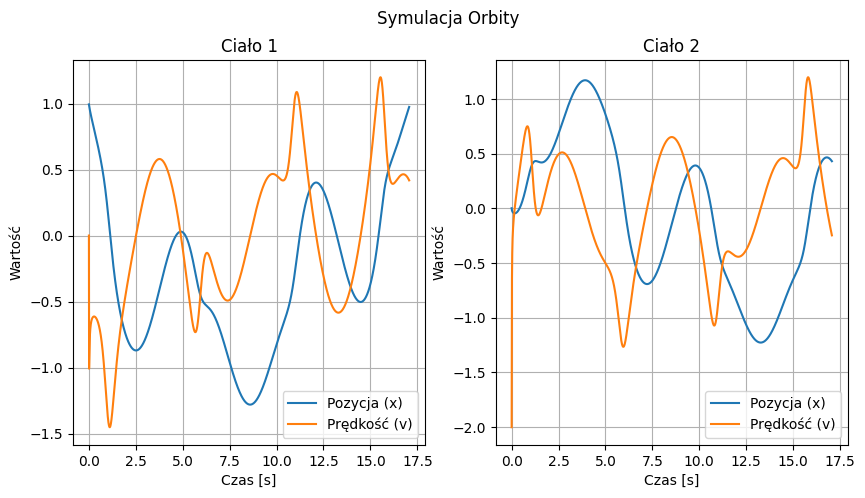

In [27]:
from main import arenstorf

t = np.linspace(0, 17.0652165601579625588917206249, 200000)
x = np.zeros((len(t), 4))
x0 = [0.994, 0, 0, -2.00158510637908252240537862224]

x[0] = x0

y = solve_euler(arenstorf, t, x)

fig, (ciało1, ciało2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Symulacja Orbity')

ciało1.plot(t, x[:, 0], label='Pozycja (x)')
ciało1.plot(t, x[:, 1], label='Prędkość (v)')
ciało1.set(xlabel='Czas [s]', ylabel='Wartość')
ciało1.set_title('Ciało 1')
ciało1.legend()
ciało1.grid()

ciało2.plot(t, x[:, 2], label='Pozycja (x)')
ciało2.plot(t, x[:, 3], label='Prędkość (v)')
ciało2.set(xlabel='Czas [s]', ylabel='Wartość')
ciało2.set_title('Ciało 2')
ciało2.legend()
ciało2.grid()

plt.show()


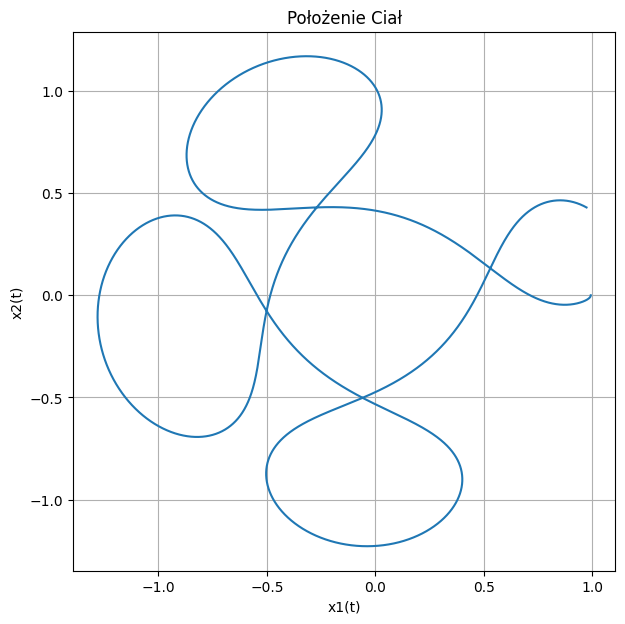

In [28]:
fig_położenie, pozycja = plt.subplots(figsize=(7, 7))
pozycja.plot(y[:, 0], y[:, 2])
pozycja.set_title('Położenie Ciał')
pozycja.set(xlabel='x1(t)', ylabel='x2(t)')
pozycja.grid()

plt.show()


Na dzisiejszych zajęciach zapoznałem się z metodą Eulera, która stanowi jedną z podstawowych technik numerycznego rozwiązywania równań różniczkowych. Metoda ta polega na przybliżeniu rozwiązania poprzez skończone kroki czasowe, co jest szczególnie użyteczne w przypadku równań niemożliwych do rozwiązania analitycznie. Dzięki tym nowo zdobytym umiejętnościom będę w stanie efektywnie modelować i analizować różnorodne procesy dynamiczne w matematyce, fizyce czy innych dziedzinach.

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
